In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import shape,math
from tensorflow.keras import Input,layers,Model
from tensorflow.keras.losses import mse,binary_crossentropy
from tensorflow.keras.utils import plot_model

print(tf.__version__)

2.9.2


## Train Dataset Loading

In [ ]:
from google.colab import files 

uploaded = files.upload()

# 코드가 돌아가면 파일선택 버튼을 눌러서 upload할 파일 선택
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) 

Saving training.zip to training.zip
User uploaded file "training.zip" with length 2482527 bytes


## Train Dataset Loading(Mixed data)

In [ ]:
from google.colab import files 

uploaded = files.upload()

# 코드가 돌아가면 파일선택 버튼을 눌러서 upload할 파일 선택
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) 

Saving testing.zip to testing.zip
User uploaded file "testing.zip" with length 4255 bytes


## Test dataset Loading(1st image)

In [ ]:
from google.colab import files 

uploaded = files.upload()

# 코드가 돌아가면 파일선택 버튼을 눌러서 upload할 파일 선택
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) 

Saving testing_0.zip to testing_0.zip
User uploaded file "testing_0.zip" with length 4146 bytes


## Test dataset Loading (2st image)

In [ ]:
from google.colab import files 

uploaded = files.upload()

# 코드가 돌아가면 파일선택 버튼을 눌러서 upload할 파일 선택
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) 

Saving training2.zip to training2.zip
User uploaded file "training2.zip" with length 2514020 bytes


## Test dataset Loadig(0, 8 mixed)

In [ ]:
from google.colab import files 

uploaded = files.upload()

# 코드가 돌아가면 파일선택 버튼을 눌러서 upload할 파일 선택
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) 

Saving 0_8_mixed.zip to 0_8_mixed.zip
User uploaded file "0_8_mixed.zip" with length 6293 bytes


In [ ]:
! mkdir mnist_png/test0

In [ ]:
! mkdir mnist_png/train2

In [ ]:
! mkdir mnist_png
! mkdir mnist_png/train
! mkdir mnist_png/test

In [ ]:
! unzip training.zip -d ./mnist_png/train

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: ./mnist_png/train/0/18586.png  
 extracting: ./mnist_png/train/0/18590.png  
 extracting: ./mnist_png/train/0/18599.png  
 extracting: ./mnist_png/train/0/18603.png  
 extracting: ./mnist_png/train/0/18606.png  
 extracting: ./mnist_png/train/0/18641.png  
 extracting: ./mnist_png/train/0/18645.png  
 extracting: ./mnist_png/train/0/18650.png  
 extracting: ./mnist_png/train/0/18658.png  
 extracting: ./mnist_png/train/0/18665.png  
 extracting: ./mnist_png/train/0/1868.png  
 extracting: ./mnist_png/train/0/18703.png  
 extracting: ./mnist_png/train/0/18712.png  
 extracting: ./mnist_png/train/0/18715.png  
 extracting: ./mnist_png/train/0/18718.png  
 extracting: ./mnist_png/train/0/18725.png  
 extracting: ./mnist_png/train/0/18737.png  
 extracting: ./mnist_png/train/0/18743.png  
 extracting: ./mnist_png/train/0/18750.png  
 extracting: ./mnist_png/train/0/18759.png  
 extracting: ./mnist_png/train/0/1876.png  
 extracting: ./mnist_

In [ ]:
# ! unzip testing.zip -d ./mnist_png/test
! unzip 0_8_mixed.zip -d ./mnist_png/test

Archive:  0_8_mixed.zip
 extracting: ./mnist_png/test/0/0.png  
 extracting: ./mnist_png/test/0/1.png  
 extracting: ./mnist_png/test/0/10.png  
 extracting: ./mnist_png/test/0/11.png  
 extracting: ./mnist_png/test/0/12.png  
 extracting: ./mnist_png/test/0/13.png  
 extracting: ./mnist_png/test/0/14.png  
 extracting: ./mnist_png/test/0/2.png  
 extracting: ./mnist_png/test/0/3.png  
 extracting: ./mnist_png/test/0/4.png  
 extracting: ./mnist_png/test/0/5.png  
 extracting: ./mnist_png/test/0/6.png  
 extracting: ./mnist_png/test/0/7.png  
 extracting: ./mnist_png/test/0/8.png  
 extracting: ./mnist_png/test/0/9.png  


In [ ]:
! unzip testing_0.zip -d ./mnist_png/test0

Archive:  testing_0.zip
 extracting: ./mnist_png/test0/0/10.png  
 extracting: ./mnist_png/test0/0/101.png  
 extracting: ./mnist_png/test0/0/126.png  
 extracting: ./mnist_png/test0/0/13.png  
 extracting: ./mnist_png/test0/0/25.png  
 extracting: ./mnist_png/test0/0/28.png  
 extracting: ./mnist_png/test0/0/3.png  
 extracting: ./mnist_png/test0/0/55.png  
 extracting: ./mnist_png/test0/0/69.png  
 extracting: ./mnist_png/test0/0/71.png  


In [ ]:
! unzip training2.zip -d ./mnist_png/train2

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: ./mnist_png/train2/0/1930.png  
 extracting: ./mnist_png/train2/0/19303.png  
 extracting: ./mnist_png/train2/0/19308.png  
 extracting: ./mnist_png/train2/0/19325.png  
 extracting: ./mnist_png/train2/0/19360.png  
 extracting: ./mnist_png/train2/0/19361.png  
 extracting: ./mnist_png/train2/0/19369.png  
 extracting: ./mnist_png/train2/0/19376.png  
 extracting: ./mnist_png/train2/0/19399.png  
 extracting: ./mnist_png/train2/0/19407.png  
 extracting: ./mnist_png/train2/0/19419.png  
 extracting: ./mnist_png/train2/0/19439.png  
 extracting: ./mnist_png/train2/0/19454.png  
 extracting: ./mnist_png/train2/0/19459.png  
 extracting: ./mnist_png/train2/0/19480.png  
 extracting: ./mnist_png/train2/0/19485.png  
 extracting: ./mnist_png/train2/0/19490.png  
 extracting: ./mnist_png/train2/0/19491.png  
 extracting: ./mnist_png/train2/0/19492.png  
 extracting: ./mnist_png/train2/0/19504.png  
 extracting: ./mnist_png/train2/0/19535.png  

## 0 이미지로만 학습하도록 구성

In [ ]:
# 압축해제된 데이터 경로
src_train = './mnist_png/train/'
src_test = './mnist_png/test/'

#이미지 읽기
def img_read(src,file):
    img = cv.imread(src+file,cv.COLOR_BGR2GRAY)
    return img

#src 경로에 있는 이미지 파일 리스트 저장 

# train data
files0 = os.listdir(src_train + str(0))

#test data
files0_test = os.listdir(src_test + str(0))

# 경로와 파일명을 입력으로 넣어 확인하고 
# 데이터를 255로 나눠서 0~1사이로 정규화 하여 X 리스트에 넣는다.
# 255로 나눠주는 이유는, 이미지 데이터는 픽셀 정보를 0~255 사이의 값으로 가지는데, 이를 255로 나누어주면 0~1.0 사이의 값을 가지게 되기 때문이다.

# train data
X,Y = [],[]
for file in files0:
  X.append(img_read(src_train + str(0) + '/',file)/255.)
  Y.append(float(file[:-4]))

# test data
X_test,Y_test = [],[]

for file in files0_test:
  X_test.append(img_read(src_test + str(0) + '/',file)/255.)
  Y_test.append(float(file[:-4]))

# Train set, Test set으로 나누기
x_train = X
y_train = Y
x_test = X_test
y_test = Y_test
x_train = np.array(x_train)
x_test = np.array(x_test)

 # (image,image)이미지를 크기의 (image*image,)크기의 벡터로 변환
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))).astype('float32')
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))).astype('float32')

print("Datasets_train_shape:{}  Datasets_test_shape:{}".format(np.shape(x_train),np.shape(x_test)))

Datasets_train_shape:(5923, 784)  Datasets_test_shape:(15, 784)


## 0 이미지 테스트 데이터 로딩

In [ ]:
src_test0 = './mnist_png/test0/'
files0_test = os.listdir(src_test0 + str(0))

# test data
X_test0,Y_test0 = [],[]

for file in files0_test:
  X_test0.append(img_read(src_test0 + str(0) + '/',file)/255.)
  Y_test0.append(float(file[:-4]))

x_test0 = X_test0
y_test0 = Y_test0
x_test0 = np.array(x_test0)
x_test0 = x_test0.reshape((len(x_test0), np.prod(x_test0.shape[1:]))).astype('float32')

## 0 이미지 + 8 이미지로 학습하도록 구성

In [ ]:
# 압축해제된 데이터 경로
src_train = './mnist_png/train2/'
src_test = './mnist_png/test/'

#이미지 읽기
def img_read(src,file):
    img = cv.imread(src+file,cv.COLOR_BGR2GRAY)
    return img

#src 경로에 있는 이미지 파일 리스트 저장 

# train data
files0 = os.listdir(src_train + str(0))
files8 = os.listdir(src_train + str(8))
#test data
files8_test = os.listdir(src_test + str(8))

# 경로와 파일명을 입력으로 넣어 확인하고 
# 데이터를 255로 나눠서 0~1사이로 정규화 하여 X 리스트에 넣는다.
# 255로 나눠주는 이유는, 이미지 데이터는 픽셀 정보를 0~255 사이의 값으로 가지는데, 이를 255로 나누어주면 0~1.0 사이의 값을 가지게 되기 때문이다.

# train data
X,Y = [],[]
for file in files0:
  X.append(img_read(src_train + str(0) + '/',file)/255.)
  Y.append(float(file[:-4]))

for file in files8:
  X.append(img_read(src_train + str(8) + '/',file)/255.)
  Y.append(float(file[:-4]))

# test data
X_test,Y_test = [],[]

for file in files8_test:
  X_test.append(img_read(src_test + str(8) + '/',file)/255.)
  Y_test.append(float(file[:-4]))

# Train set, Test set으로 나누기
x_train = X
y_train = Y
x_test = X_test
y_test = Y_test
x_train = np.array(x_train)
x_test = np.array(x_test)

 # (image,image)이미지를 크기의 (image*image,)크기의 벡터로 만듭니다
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))).astype('float32')
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))).astype('float32')

print("Datasets_train_shape:{}  Datasets_test_shape:{}".format(np.shape(x_train),np.shape(x_test)))

Datasets_train_shape:(6000, 784)  Datasets_test_shape:(10, 784)


In [ ]:
# network parameters
input_shape = np.shape(x_train[0])[0]
original_dim= input_shape
intermediate_dim = 512
latent_dim = 3

print(input_shape)

784


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_shape (InputLayer)       [(None, 784)]        0           []                               
                                                                                                  
 encoder_hidden1 (Dense)        (None, 512)          401920      ['input_shape[0][0]']            
                                                                                                  
 z_mean (Dense)                 (None, 3)            1539        ['encoder_hidden1[0][0]']        
                                                                                                  
 z_log_var (Dense)              (None, 3)            1539        ['encoder_hidden1[0][0]']        
                                                                                            

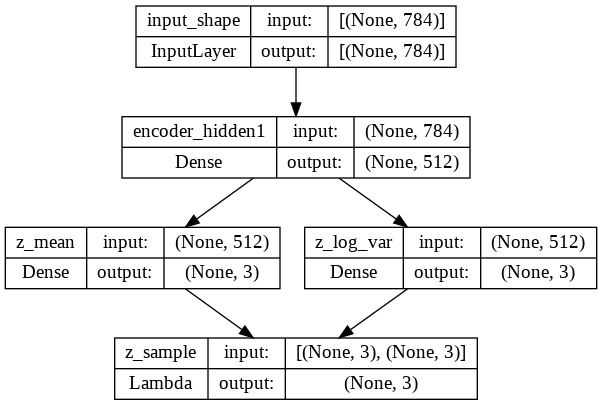

In [ ]:
def encoder():
  # 인코더의 입력층을 생성합니다.
  inputs = Input(shape=(input_shape,), name='input_shape')

  # 인코더의 hidden층을 생성합니다. 500개의 유닛을 사용했습니다.
  encoder_hidden = layers.Dense(intermediate_dim, activation='relu', name='encoder_hidden1')(inputs)

  # 평균(mean)과 표준편차(sigma)층을 정의합니다. 
  # 이때 sigma 대신 log variance를 사용합니다. 이는 신경망의 출력은 음수를 가질 수 있지만 sigma는 항상 양수여야 하기 때문입니다. 
  # 각각 2개의 유닛을 사용했습니다.
  z_mean = layers.Dense(latent_dim, name='z_mean')(encoder_hidden)
  z_log_var = layers.Dense(latent_dim, name='z_log_var')(encoder_hidden)

  # 평균과 표준편차를 래핑하여 Z_sampling층을 만듭니다.

  # Z 샘플링 함수 생성
  def sampling(args):
      z_mean, z_log_var = args
      batch = shape(z_mean)[0]
      dim = shape(z_mean)[1]

      # by default, random_normal has mean = 0 and std = 1.0
      # Reparameterization Trick사용을 위해 Gussian(=normal)분포에서 랜덤변수(sample) ε추출 
      epsilon = tf.compat.v2.random.normal(shape=(batch, dim))
      return z_mean + tf.math.exp(0.5 * z_log_var) * epsilon

  #  layers.Lambda API 래핑에 사용할 함수와, 유닛수(n,)를 지정합니다.
  z_sampling = layers.Lambda(sampling, (latent_dim,), name='z_sample')([z_mean, z_log_var])

  # 하나의 입력과 다중충력을 포함하는 encoder 모델을 만듭니다.   
  return Model(inputs,[z_mean,z_log_var,z_sampling], name='encoder')

encoder = encoder()

# 인코더 네트워크를 확인합니다.
encoder.summary()

from tensorflow.keras.utils import plot_model
plot_model(encoder, to_file='vae_mlp_encoder.png', show_shapes=True)

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_z (InputLayer)        [(None, 3)]               0         
                                                                 
 decoder_hidden (Dense)      (None, 512)               2048      
                                                                 
 output (Dense)              (None, 784)               402192    
                                                                 
Total params: 404,240
Trainable params: 404,240
Non-trainable params: 0
_________________________________________________________________


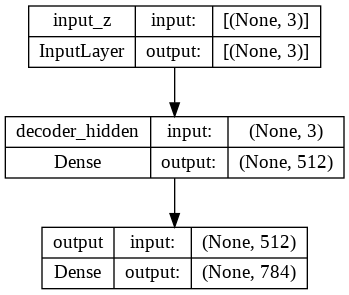

In [ ]:
def decoder():
  
  # 디코더의 입력층을 생성합니다. (Decoder의 입력은 latent입니다)
  input_z = Input(shape=(latent_dim,), name='input_z')

  # 디코더의 hidden층을 생성합니다. 인코더와 동일하게 500개의 유닛을 사용했습니다.
  decoder_hidden = layers.Dense(intermediate_dim, activation='relu', name='decoder_hidden')(input_z)

  # 디코더의 출력층은 인코더 입력벡터 수만큼 유닛을 사용합니다.
  outputs = layers.Dense(original_dim, activation='sigmoid',name='output')(decoder_hidden)

  return Model(input_z, outputs, name='decoder')

decoder = decoder()

# 디코더의 네트워크 확인.
decoder.summary()
plot_model(decoder, to_file='vae_mlp_decoder.png', show_shapes=True)

Model: "vae_mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (InputLayer)    [(None, 784)]             0         
                                                                 
 encoder (Functional)        [(None, 3),               404998    
                              (None, 3),                         
                              (None, 3)]                         
                                                                 
 decoder (Functional)        (None, 784)               404240    
                                                                 
Total params: 809,238
Trainable params: 809,238
Non-trainable params: 0
_________________________________________________________________


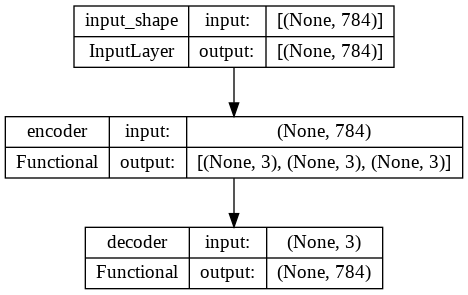

In [ ]:
def vae():
  # vae는 입력으로 이미지로 들어와 encoder를 통해 z_sampling 되어 decoder로 출력됩니다.  
  inputs = Input(shape=(input_shape,), name='input_shape')
  outputs = decoder(encoder(inputs)[2]) #[0]:z_mean, [1]:z_log_var,[2]:z_sampling
  
  return Model(inputs,outputs, name='vae_mlp')

#VAE 모델 정의
model = vae()

#모델 네트워크 확인 
model.summary()
plot_model(model,to_file='vae_mlp.png',show_shapes=True)

In [ ]:
# Hyperparameters
num_epochs = 50
batch_size = 100
learning_rate = 1e-3

In [ ]:
# 모델 학습 loss, optimizer 정의
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
def vae_loss(x,recon_x):
    # (1)Reconstruct loss (Marginal_likelihood) : Cross-entropy 
    z_mean,z_log_var,z_sampling = encoder(x)
    recon_x=decoder(z_sampling)
    reconstruction_loss = binary_crossentropy(x,recon_x)
    #reconstruction_loss = mse(inputs, outputs)
    reconstruction_loss *= original_dim
    # (2) KL divergence(Latent_loss)
    kl_loss = 0.5 * tf.reduce_sum(tf.square(z_mean)+ tf.exp(z_log_var)- z_log_var -1, 1) 
    return tf.reduce_mean(reconstruction_loss + kl_loss) #ELBO(=VAE_loss)

model.compile(optimizer=adam,loss=vae_loss)

In [ ]:
# 모델 학습
hist = model.fit(x_train, x_train, epochs=num_epochs, batch_size=batch_size )
#학습된 VAE 모델 저장 
model.save_weights('vae_mnist_0.h5')

Epoch 1/50
Tensor("vae_loss/Mean_1:0", shape=(), dtype=float32)
Tensor("vae_loss/Mean_1:0", shape=(), dtype=float32)
60/60 [==============================] - 2s 20ms/step - loss: 133.0927
Epoch 2/50
60/60 [==============================] - 1s 18ms/step - loss: 132.7613
Epoch 3/50
60/60 [==============================] - 1s 19ms/step - loss: 132.7793
Epoch 4/50
60/60 [==============================] - 1s 19ms/step - loss: 132.7556
Epoch 5/50
60/60 [==============================] - 1s 19ms/step - loss: 132.6875
Epoch 6/50
60/60 [==============================] - 1s 19ms/step - loss: 132.6258
Epoch 7/50
60/60 [==============================] - 1s 19ms/step - loss: 132.5212
Epoch 8/50
60/60 [==============================] - 1s 21ms/step - loss: 132.3995
Epoch 9/50
60/60 [==============================] - 1s 19ms/step - loss: 132.3603
Epoch 10/50
60/60 [==============================] - 1s 21ms/step - loss: 132.3209
Epoch 11/50
60/60 [==============================] - 1s 21ms/step - loss:

## 0으로 학습한 후, 8 이미지 reconstruction

In [ ]:
recon_x_test = model.predict(x_test)
print(len(recon_x_test[0]))
print(recon_x_test[0][0])

n = 10  # how many digits we will display
plt.figure(figsize=(15, 4))
for i in range(10):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28), vmin=0, vmax=1, cmap="gray")
    plt.title("Input"+str(i))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #plt.colorbar()

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(recon_x_test[i].reshape(28, 28),vmin=0, vmax=1, cmap="gray")
    plt.title("Recon"+str(i))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #plt.colorbar()
plt.show()


NameError: ignored

## 0으로 학습한 후, 0 이미지 reconstruction

1/1 [==============================] - 0s 18ms/step


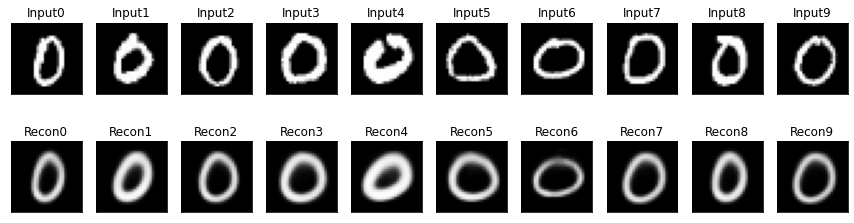

In [ ]:
recon_x_test0 = model.predict(x_test0)

n = 10  # how many digits we will display
plt.figure(figsize=(15, 4))
for i in range(10):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test0[i].reshape(28,28), vmin=0, vmax=1, cmap="gray")
    plt.title("Input"+str(i))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #plt.colorbar()

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(recon_x_test0[i].reshape(28, 28),vmin=0, vmax=1, cmap="gray")
    plt.title("Recon"+str(i))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #plt.colorbar()
plt.show()

## 0 이미지 5900개, 8 이미지 100개로 학습

### 8 이미지 넣고 reconstruciton

1/1 [==============================] - 0s 81ms/step


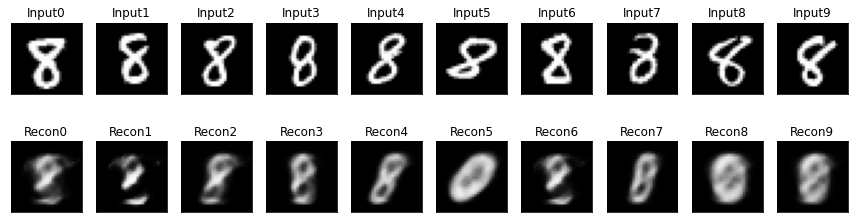

In [ ]:
recon_x_test = model.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(15, 4))
for i in range(10):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28), vmin=0, vmax=1, cmap="gray")
    plt.title("Input"+str(i))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #plt.colorbar()

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(recon_x_test[i].reshape(28, 28),vmin=0, vmax=1, cmap="gray")
    plt.title("Recon"+str(i))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #plt.colorbar()
plt.show()

## 0 이미지 넣고 reconstruction

1/1 [==============================] - 0s 20ms/step


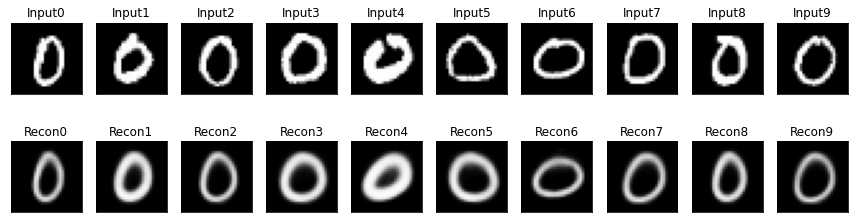

In [ ]:
recon_x_test0 = model.predict(x_test0)

n = 10  # how many digits we will display
plt.figure(figsize=(15, 4))
for i in range(10):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test0[i].reshape(28,28), vmin=0, vmax=1, cmap="gray")
    plt.title("Input"+str(i))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #plt.colorbar()

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(recon_x_test0[i].reshape(28, 28),vmin=0, vmax=1, cmap="gray")
    plt.title("Recon"+str(i))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #plt.colorbar()
plt.show()